In [6]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=10000, n_features=4, n_informative=2, random_state=3)
# summarize the dataset
print(X.shape, y.shape)

(10000, 4) (10000,)


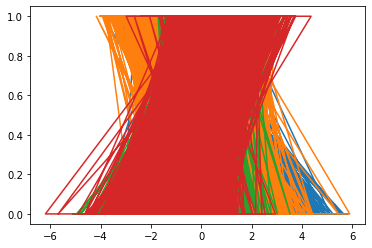

In [7]:
import matplotlib.pyplot as plt

plt.plot(X, y)

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Ejemplo con Kfold, no usa los datos anteriores, es solo un ejemplo

In [10]:
#Example Kfold:

X_train_example = np.array([[1, 2], [3, 4], [1, 8], [3, 5]])
y_train_example = np.array([[1], [3], [6], [9]])
random_state = 1288
rkf = RepeatedKFold(n_splits=3, n_repeats=2, random_state=random_state)
for i, train in enumerate(rkf.split(X=X_train_example)):
    # Izquierda -- Conjuntos de entrenamiento por iteración
    # Derecha -- Conjuntos de validación por iteración
    # n_repeats -- Representa el número de batches que van a ocurrir durante nuestro entrenamiento
    # Batch de datos por iteración 
    # Época/Epoch 
    print("Iteración", i+1, ":")
    print(train)
    print("-------------------")
    if i == 2:
        print("#################")

Iteración 1 :
(array([0, 1]), array([2, 3]))
-------------------
Iteración 2 :
(array([1, 2, 3]), array([0]))
-------------------
Iteración 3 :
(array([0, 2, 3]), array([1]))
-------------------
#################
Iteración 4 :
(array([1, 3]), array([0, 2]))
-------------------
Iteración 5 :
(array([0, 1, 2]), array([3]))
-------------------
Iteración 6 :
(array([0, 2, 3]), array([1]))
-------------------


In [11]:
from sklearn.model_selection import KFold

# define the model
model = RandomForestClassifier()
# evaluate the model 
# THIS DOESN'T TRAIN THE MODEL
k_fold = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=2)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=k_fold, n_jobs=-1, error_score='raise')
# report performance
print(n_scores)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

[0.9375  0.91625 0.91375 0.9375  0.925   0.92    0.935   0.9325  0.925
 0.935   0.92625 0.93625 0.92875 0.9225  0.95125 0.92375 0.92375 0.92125
 0.92    0.915  ]
Accuracy: 0.927 (0.009)


In [12]:
max(n_scores)

0.95125

In [13]:
min(n_scores)

0.91375

In [14]:
#model.score(X_train, y_train)

# Cross validation

### TRAINING

In [15]:
import pickle
import os

In [16]:
len(X_train)

8000

In [17]:
k_fold = RepeatedKFold(n_splits=15, n_repeats=1, random_state=1)
val_score = []
train_score = []
# define the model
n_stimators = 1500
model = RandomForestClassifier(warm_start=True)
path = os.getcwd() + os.sep
print("path:", path)
# train son las POSICIONES de los elementos que hay que coger por iteración como parte del conjunto de entrenamiento
# val son las POSICIONES de los elementos que hay que coger por iteración como parte del conjunto de validación
for i, (train, val) in enumerate(k_fold.split(X_train)):
    print("Iteración:", i+1)
    print("train/índices batch:", train)
    print("batch_size:", len(train))
    #print("val:", val)
    print("val_size:", len(val))
    #print("batch:", X_train[train])

    # train the model
    model.fit(X_train[train], y_train[train])

    # Add more stimators
    model.n_estimators += 100

    score_val = model.score(X_train[val], y_train[val])
    val_score.append(score_val)
    score_train = model.score(X_train[train], y_train[train])
    train_score.append(score_train)
    # Ejemplo de guardar y parar el entrenamiento por haber conseguido un buen resultado
    if np.mean(val_score) > 0.99 and len(val_score) > 50:
        pickle.dump(model, open(path + "model_saved.sav", "wb"))
        print("STOP")
        break
    print("##############")

path: z:\Data_Science\TheBridge\Content\Contenido_Curso\data_science_apr_2021\week9_ML_svm_poly_norm\day5\trees\
Iteración: 1
train/índices batch: [   0    1    2 ... 7997 7998 7999]
batch_size: 7466
val_size: 534
##############
Iteración: 2
train/índices batch: [   0    1    2 ... 7997 7998 7999]
batch_size: 7466
val_size: 534
##############
Iteración: 3
train/índices batch: [   0    1    2 ... 7997 7998 7999]
batch_size: 7466
val_size: 534
##############
Iteración: 4
train/índices batch: [   0    1    2 ... 7997 7998 7999]
batch_size: 7466
val_size: 534
##############
Iteración: 5
train/índices batch: [   0    1    2 ... 7996 7997 7998]
batch_size: 7466
val_size: 534
##############
Iteración: 6
train/índices batch: [   0    1    2 ... 7997 7998 7999]
batch_size: 7467
val_size: 533
##############
Iteración: 7
train/índices batch: [   0    1    2 ... 7997 7998 7999]
batch_size: 7467
val_size: 533
##############
Iteración: 8
train/índices batch: [   0    2    3 ... 7996 7997 7999]
batch

[0.9400749063670412,
 0.9644194756554307,
 0.9719101123595506,
 0.9943820224719101,
 0.9962546816479401,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

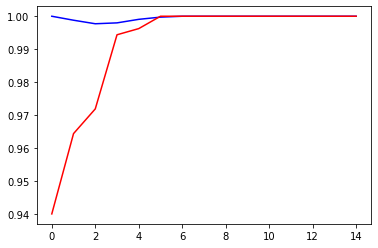

In [18]:
plt.plot(train_score, color="b")
plt.plot(val_score, color="r")
val_score

In [19]:
model.score(X_test, y_test)

0.9325

### ONE LINE



In [20]:
k_fold = KFold(n_splits=4, random_state=1)

[model.fit(X_train[train], y_train[train]).score(X_train[val], y_train[val]) for train, val in k_fold.split(X_train)]

Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\sklearn\ensemble\_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\sklearn\ensemble\_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\sklearn\ensemble\_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn

[1.0, 1.0, 1.0, 1.0]

### Con 3 batches

In [21]:
# define the model
model_batches = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)
n_scores = cross_val_score(model_batches, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.927 (0.009)


### To predict

In [22]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 0])

In [23]:
model.score(X=X_test, y=y_test)

0.932

In [24]:
import pickle
import os
### To load
path = os.getcwd() + os.sep
full_file_name = path + "model_saved.sav"
loaded_model = pickle.load(open(full_file_name, 'rb'))
# Ahora puedes predecir ya que está entrenado
loaded_model.predict(X_test)

array([1, 0, 1, ..., 1, 1, 0])

In [25]:
os.path.abspath(".")

'z:\\Data_Science\\TheBridge\\Content\\Contenido_Curso\\data_science_apr_2021\\week9_ML_svm_poly_norm\\day5\\trees'

In [26]:
os.getcwd()

'z:\\Data_Science\\TheBridge\\Content\\Contenido_Curso\\data_science_apr_2021\\week9_ML_svm_poly_norm\\day5\\trees'